In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [2]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


# Import the Fashion MNIST dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

# PreProcess the data

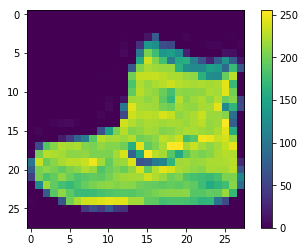

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [11]:
##We scale these values to a 
##range of 0 to 1 before feeding to the neural network model. 
##For this, cast the datatype of the image components from an integer to a 
##float, and divide by 255. Here's the function to preprocess the images:
##It's important that the training set and the testing set are preprocessed 
##in the same way:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [13]:
##Display the first 25 images from the training set and display the class name 
##below each image. Verify that the data is in the correct format and we're 
##ready to build and train the network.

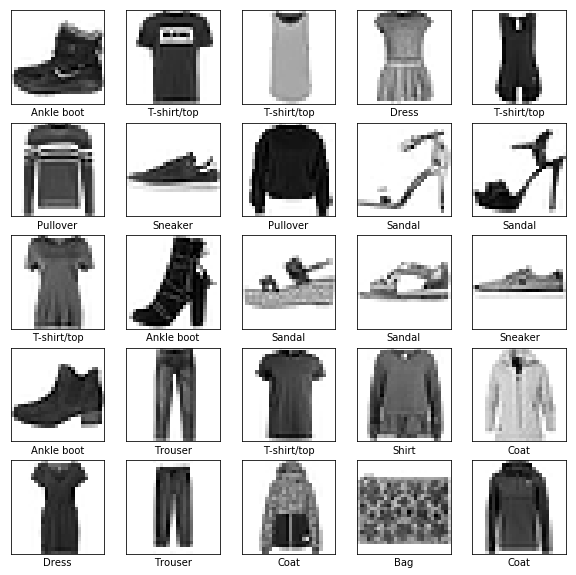

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# Build the model

# #Setup the layers

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Compile the layers

#### Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified

In [16]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

## Training the neural network model requires the following steps:

Feed the training data to the model—in this example, the train_images and train_labels arrays.
The model learns to associate images and labels.
We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.
To start training, call the model.fit method—the model is "fit" to the training data

In [17]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.4918 - acc: 0.8260
Epoch 2/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.3705 - acc: 0.8651
Epoch 3/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.3327 - acc: 0.8787
Epoch 4/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.3102 - acc: 0.8866
Epoch 5/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.2935 - acc: 0.8926


# Evaluate accuracy

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 20us/step
Test accuracy: 0.878


test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

# Make Predictions

With the model trained, we can use it to make predictions about some images.

In [19]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([2.0655283e-07, 4.7267972e-07, 3.8021616e-07, 8.2831029e-08,
       5.8791315e-06, 4.7695572e-03, 6.1966857e-06, 6.5088801e-02,
       5.9348558e-06, 9.3012244e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

So the model is most confident that this image is an ankle boot, or class_names[9]. And we can check the test label to see this is correct: 

In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array.

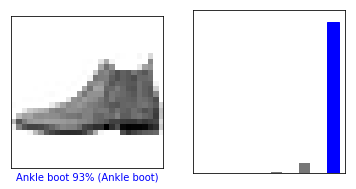

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

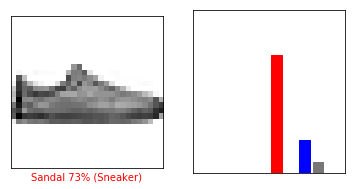

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

 Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

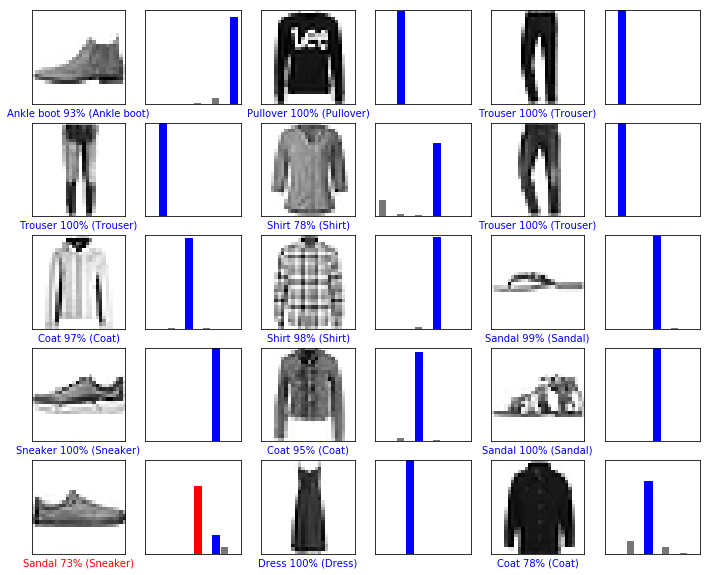

In [30]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

Finally, use the trained model to make a prediction about a single image.

In [35]:
# Grab an image from the test dataset
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [36]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the image:

In [37]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.5002571e-04 1.4003597e-08 9.9566674e-01 4.3871771e-07 2.6133216e-03
  2.4265335e-11 1.4692205e-03 4.0703400e-12 9.9382284e-08 2.7010496e-13]]


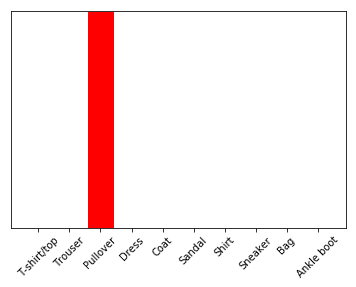

In [38]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [39]:
np.argmax(predictions_single[0])

2